# Introducción

La fase de Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) tiene como objetivo comprender la estructura, calidad y relaciones presentes en el conjunto de datos antes de aplicar cualquier técnica de modelado. A través de esta etapa, se identifican patrones relevantes, posibles valores atípicos, correlaciones entre variables y problemas como datos faltantes o codificaciones inconsistentes. En este caso, el EDA se aplica sobre un conjunto de datos financieros de empresas ya anonimizado, lo que permite examinar de forma segura su composición y características principales. Esta exploración es fundamental para guiar las decisiones posteriores en el preprocesamiento, selección de variables y construcción de modelos predictivos robustos.

Este fragmento inicial del notebook de análisis exploratorio de datos (EDA) carga el conjunto de datos anonimizado companies_T_anon.parquet, que contiene información financiera de empresas previamente transformada para proteger su identidad. Se utiliza la librería pandas, una herramienta esencial en ciencia de datos, para leer el archivo en formato Parquet, un formato eficiente para datos tabulares. A partir de aquí, el DataFrame df almacenará los datos que se analizarán en profundidad para entender su estructura, calidad y patrones antes de aplicar modelos predictivos. Esta etapa es clave para asegurar un modelado fiable.

In [1]:
import pandas as pd

# Cargar datos
ruta_parquet = "companies_T_anon.parquet"  
df = pd.read_parquet(ruta_parquet)


In [2]:
# Porcentaje de valores nulos
porcentaje_nulos = df.isnull().mean().sort_values(ascending=False) * 100
print("Porcentaje de nulos por columna:")
print(porcentaje_nulos)

# Tipos de datos
print("\n Tipos de columnas:")
print(df.dtypes)

# Estadísticas descriptivas
print("\n Estadísticas básicas:")
print(df.describe(include='all').transpose())


Porcentaje de nulos por columna:
antiguedad_cuenta_dias           69.545455
media_dias_impago                69.545455
importe_cobro_medio              69.545455
existencias_ventas%              23.863636
inversiones_financieras_lp%      23.863636
deuda_financiera_lp%             23.863636
periodo_medio_almacenamiento%    23.636364
deuda_financiera_cp%             19.772727
numero_trabajadores              18.409091
apalancamiento_financiero        18.409091
coste_financiero%                18.181818
gastos_financieros%              17.727273
inmovilizado_material%           16.818182
gastos_personal%                 16.590909
inmovilizado_material            16.363636
periodo_medio_cobro%             15.909091
gastos_personal                  15.909091
ebitda_gastos_financieros%       15.681818
margen_final                     15.454545
ventas_netas                     15.454545
resultados_ejercicio%            15.454545
resultados_ejercicio             15.454545
periodo_medio_pago%  

Este bloque de código realiza un análisis exploratorio inicial del conjunto de datos, con tres objetivos principales: identificar valores nulos, conocer los tipos de datos y obtener estadísticas básicas de las variables.

Primero, se calcula el porcentaje de valores nulos por columna. Esto permite detectar variables que podrían afectar negativamente el análisis o el modelado debido a una alta proporción de datos faltantes. Por ejemplo, columnas como antiguedad_cuenta_dias y media_dias_impago presentan más de un 69% de nulos, lo que sugiere que podrían ser candidatas para eliminación o imputación cuidadosa.

A continuación, se examinan los tipos de datos de todas las columnas. La mayoría son variables numéricas en formato float64, aunque también hay algunas como codigo_empresa (int64) y fecha_constitucion (datetime64[ns]), así como grade_code, que aparece como objeto, indicando probablemente una codificación categórica en forma de string.

Por último, se imprimen estadísticas descriptivas con .describe(), lo que permite observar medidas de tendencia central (media, mediana), dispersión (desviación estándar), y valores extremos (mínimos y máximos). Esta información es útil para detectar posibles outliers y errores de registro. Por ejemplo, variables como ventas_netas, fondos_propios o gastos_personal muestran una enorme dispersión, mientras que otras como margen_ebitda o margen_final se concentran en rangos mucho más estrechos. También se evidencian valores negativos en variables donde no siempre serían esperables (como en número_trabajadores o ventas_netas%), lo cual invita a una revisión detallada.

Este paso resulta crucial para tomar decisiones informadas en las siguientes fases del proyecto, como la imputación de valores, la selección de variables o la creación de nuevas métricas derivadas.


### Las variables

Las variables incluidas en este conjunto de datos permiten analizar múltiples dimensiones de la situación financiera de las empresas. Algunas variables se centran en la estructura financiera, como apalancamiento_financiero y autonomia_financiera, que indican, respectivamente, el nivel de endeudamiento y la independencia del capital propio respecto a los recursos externos. Complementariamente, se incluyen sus porcentajes de variación (autonomia_financiera%), lo que permite evaluar la evolución de estas métricas a lo largo del tiempo.

Otras variables están relacionadas con la liquidez y la operativa de caja, como cash_flow_antes_var, fondo_maniobra_porcentual% o deuda_financiera_cp%, que nos dan señales sobre la capacidad de la empresa para afrontar pagos en el corto plazo. Además, indicadores como dfn_ebitda y ebitda_gastos_financieros sirven para evaluar la capacidad de la empresa de afrontar sus obligaciones financieras con los beneficios operativos, lo que es crucial en modelos de scoring crediticio.

La eficiencia operativa y logística también se mide mediante variables como existencias_ventas, periodo_medio_almacenamiento% o importe_cobro_medio, que reflejan la gestión de inventario y la recuperación de ingresos. Estos datos ayudan a identificar cuellos de botella o retrasos que podrían poner en riesgo la solvencia.

Asimismo, se recogen indicadores de tamaño y estructura de costes, como numero_trabajadores y gastos_personal, que sirven como proxies del volumen y la complejidad de la empresa. También están presentes variables como inmovilizado_material y inversiones_financieras_lp%, que apuntan a la estrategia de inversión a largo plazo.

Finalmente, variables como grade_code (que representa la nota crediticia) o media_dias_impago están directamente relacionadas con el objetivo del modelo: identificar el riesgo de impago o la solvencia futura de una empresa. Estas variables son esenciales tanto como variable target (en el caso de grade_code) como predictoras clave del comportamiento financiero (como en media_dias_impago).

| Variable                         | Descripción                                                                                      |
|----------------------------------|--------------------------------------------------------------------------------------------------|
| antiguedad_cuenta_dias           | Días desde la apertura de la cuenta. Indica estabilidad.                                          |
| apalancamiento_financiero        | Relación entre deuda y capital propio. Riesgo de endeudamiento.                                  |
| autonomia_financiera             | Fondos propios sobre activos. Mide independencia financiera.                                     |
| autonomia_financiera%            | Cambio interanual a 3 años de la autonomía financiera.                                           |
| cash_flow_antes_var              | Flujo de caja antes de variación de capital. Mide liquidez operativa.                           |
| codigo_empresa                   | Identificador único de empresa. Útil para seguimiento, no para scoring.                         |
| coste_financiero                 | Costes derivados de la deuda. Refleja carga financiera.                                          |
| coste_financiero%               | Evolución del coste financiero en 3 años.                                                       |
| deuda_financiera_cp%             | Cambio del peso de deuda a corto plazo. Indica riesgo de liquidez.                              |
| deuda_financiera_lp%             | Cambio del peso de deuda a largo plazo. Estabilidad o dependencia de financiación.              |
| dfn_ebitda                       | Deuda financiera neta sobre EBITDA. Capacidad de pago.                                          |
| dfn_ebitda%                      | Variación de dfn/EBITDA en 3 años.                                                              |
| ebitda_gastos_financieros        | EBITDA sobre gastos financieros. Capacidad de cobertura.                                        |
| ebitda_gastos_financieros%       | Evolución de la cobertura financiera.                                                           |
| existencias_ventas               | Inventario sobre ventas. Mide eficiencia operativa.                                             |
| existencias_ventas%              | Variación en eficiencia de inventario.                                                          |
| fecha_constitucion               | Año de creación. Se relaciona con antigüedad de la empresa.                                     |
| fondo_maniobra_porcentual%       | Evolución del fondo de maniobra. Indica cambios en liquidez.                                    |
| fondos_propios                   | Capital propio total. Mide solvencia.                                                           |
| fondos_propios%                  | Evolución de los fondos propios.                                                                |
| gastos_financieros%              | Cambio en la proporción de gastos financieros.                                                  |
| gastos_personal                  | Total gastado en sueldos. Refleja tamaño y estructura de costos.                               |
| gastos_personal%                 | Variación de gasto en personal.                                                                |
| grade_code                       | Nota crediticia asignada. Variable objetivo o de clasificación.                                 |
| importe_cobro_medio              | Tiempo medio de cobro. Mide eficiencia en la recuperación de ingresos.                          |
| inmovilizado_material            | Valor de activos fijos. Indica inversión en infraestructura.                                    |
| inmovilizado_material%           | Cambio en la inversión en inmovilizado.                                                         |
| inversiones_financieras_lp%      | Variación de inversiones financieras a largo plazo.                                             |
| margen_ebitda                    | EBITDA sobre ventas. Mide rentabilidad operativa.                                               |
| margen_final                     | Beneficio neto sobre ventas. Rentabilidad final.                                                |
| media_dias_impago                | Días medios de retraso en pagos. Indicador directo de riesgo.                                   |
| nof_ventas                       | Necesidad operativa de fondos. Ciclo financiero.                                                |
| nof_ventas%                      | Variación del ciclo de caja.                                                                   |
| numero_trabajadores              | Tamaño de la empresa.                                                                            |
| periodo_medio_almacenamiento%    | Cambio en días de inventario. Mide eficiencia logística.                                        |
| periodo_medio_cobro%             | Evolución en días para cobrar. Relacionado con liquidez.                                        |
| periodo_medio_pago%              | Cambios en días de pago. Puede reflejar tensión de caja.                                        |
| resultados_ejercicio             | Beneficio neto anual. Mide la salud financiera.


En este proyecto trabajamos con un conjunto de variables financieras que reflejan múltiples dimensiones de la salud económica de las empresas, tales como liquidez, endeudamiento, rentabilidad y eficiencia operativa. Muchas de las variables básicas van acompañadas de su respectivo porcentaje de evolución a lo largo de un periodo de tres años. Para ello, hemos calculado la variación porcentual como la tasa de crecimiento o decrecimiento acumulado, lo que permite capturar tendencias importantes más allá del valor absoluto. Por ejemplo, autonomia_financiera mide la independencia financiera de la empresa, mientras que autonomia_financiera% muestra si esa independencia ha mejorado o empeorado en los últimos años. De forma similar, variables como coste_financiero, fondos_propios, o dfn_ebitda ofrecen una visión puntual, y sus versiones en porcentaje indican la evolución temporal. Este enfoque nos ha permitido no solo evaluar el estado actual de las empresas, sino también su trayectoria, lo cual es especialmente relevante en el contexto del credit scoring, donde las tendencias pueden anticipar comportamientos futuros. Además, hemos incluido indicadores operativos como numero_trabajadores, importe_cobro_medio o periodo_medio_pago%, que complementan la visión financiera con una perspectiva funcional del negocio.

In [9]:
# Tamaño del dataset
print("Forma del dataset:", df.shape)

# Tipos de datos y valores no nulos
df.info()

# Estadísticas descriptivas
df.describe()

Forma del dataset: (440, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   antiguedad_cuenta_dias         134 non-null    float64       
 1   apalancamiento_financiero      359 non-null    float64       
 2   autonomia_financiera           372 non-null    float64       
 3   autonomia_financiera%          372 non-null    float64       
 4   cash_flow_antes_var            372 non-null    float64       
 5   codigo_empresa                 440 non-null    int64         
 6   coste_financiero               372 non-null    float64       
 7   coste_financiero%              360 non-null    float64       
 8   deuda_financiera_cp%           353 non-null    float64       
 9   deuda_financiera_lp%           335 non-null    float64       
 10  dfn_ebitda                     372 non-null    float64   

,antiguedad_cuenta_dias,apalancamiento_financiero,autonomia_financiera,autonomia_financiera%,cash_flow_antes_var,codigo_empresa,coste_financiero,coste_financiero%,deuda_financiera_cp%,deuda_financiera_lp%,...,nof_ventas,nof_ventas%,numero_trabajadores,periodo_medio_almacenamiento%,periodo_medio_cobro%,periodo_medio_pago%,resultados_ejercicio,resultados_ejercicio%,ventas_netas,ventas_netas%
count,134.000000,359.000000,372.000000,372.000000,3.720000e+02,440.000000,3.720000e+02,3.600000e+02,353.000000,3.350000e+02,...,372.000000,372.000000,359.000000,336.000000,370.000000,372.000000,3.720000e+02,372.000000,3.720000e+02,372.000000
mean,886.917910,0.351462,0.269656,17.231005,3.749722e+06,220.500000,3.889786e+03,1.504986e+05,400.081312,3.511438e+04,...,0.215211,-99.233413,638.573816,116.252852,36.719685,966.267442,3.898369e+06,61.613126,1.411689e+08,114.788863
min,119.000000,-2.250000,-0.698500,-371.212121,-7.282700e+07,1.000000,-8.644000e-01,-1.317368e+04,-111.797430,-9.808876e+01,...,-1.884500,-15350.000000,1.000000,-100.000000,-100.000000,-100.034361,-1.403690e+08,-39621.458541,2.428668e+05,-78.019605
25%,527.250000,0.000000,0.145625,-18.260457,0.000000e+00,110.750000,2.935000e-02,1.714067e+01,3.080933,-3.739906e+01,...,0.029900,-52.956608,18.000000,-36.079395,-26.950025,-28.992029,1.262466e+05,-53.360086,1.152743e+07,12.051666
50%,784.000000,0.700000,0.222450,3.592366,0.000000e+00,220.500000,5.135000e-02,7.529892e+01,41.712660,-1.464264e+01,...,0.138050,-12.015705,48.000000,-5.280087,-6.521087,0.411916,4.391810e+05,20.230927,2.465906e+07,41.235585
75%,1122.000000,0.750000,0.350475,28.143952,0.000000e+00,330.250000,8.592500e-02,1.437748e+02,160.978740,1.149121e+01,...,0.299475,31.512720,141.000000,28.630428,21.401203,45.705768,1.280706e+06,179.158146,5.487184e+07,80.209293
max,4602.000000,1.500000,0.983800,1423.660714,7.404020e+08,440.000000,1.317771e+06,5.315590e+07,35675.990111,1.172404e+07,...,2.716700,5470.833333,52345.000000,25397.247706,3800.000000,277266.666667,6.745230e+08,27631.062858,1.150001e+10,5925.959866
std,592.172247,1.071876,0.194629,111.196672,4.068891e+07,127.161315,6.851871e+04,2.801876e+06,2309.600185,6.405476e+05,...,0.383604,1273.756660,4391.904121,1420.245301,293.371634,14551.548833,3.960454e+07,2606.899089,7.988361e+08,449.360253


El dataset contiene 440 registros y 40 columnas, donde cada fila representa una empresa y cada columna describe una variable financiera o contable. La mayoría de las variables son numéricas (float64), aunque también se incluyen una fecha (fecha_constitucion) y una categoría (grade_code). Algunas columnas presentan una alta proporción de valores nulos, como antiguedad_cuenta_dias, media_dias_impago o importe_cobro_medio, lo que requiere un tratamiento adecuado durante el preprocesamiento. El conjunto combina variables en valor absoluto con tasas de cambio interanuales (%), lo que permite analizar tanto la situación financiera actual como su evolución reciente.


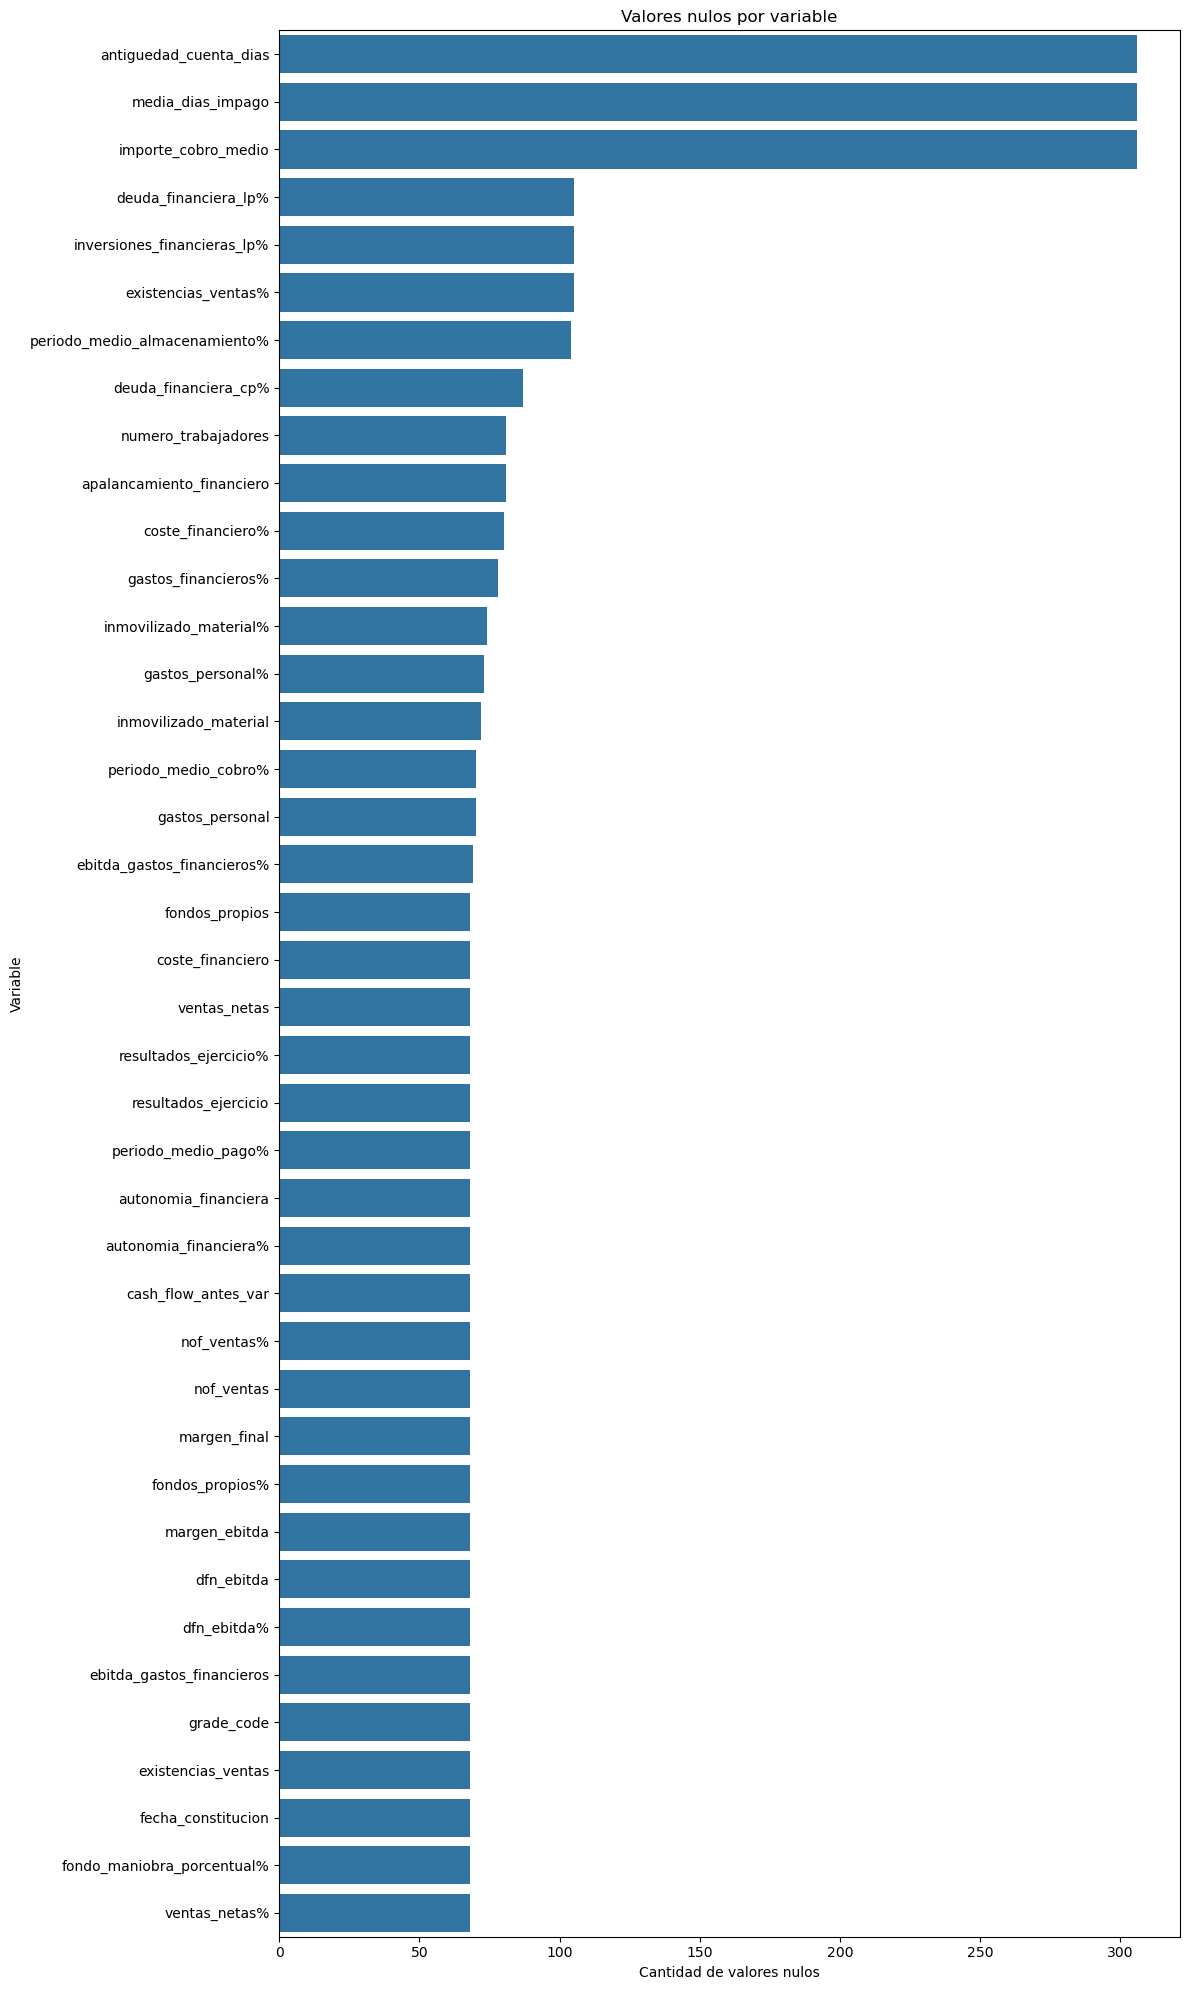

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo de valores nulos
missing_values = df.isna().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Visualización
plt.figure(figsize=(12, 20))
sns.barplot(x=missing_values.values, y=missing_values.index)
plt.title("Valores nulos por variable")
plt.xlabel("Cantidad de valores nulos")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

El gráfico muestra las variables con mayor proporción de valores nulos en el dataset. Se observa que antiguedad_cuenta_dias, media_dias_impago e importe_cobro_medio presentan la mayor cantidad de ausencias, lo cual podría dificultar su uso directo en modelos predictivos sin una imputación adecuada. También destacan variables como deuda_financiera_lp%, existencias_ventas% o inversiones_financieras_lp%, que reflejan aspectos clave del perfil financiero de las empresas pero requieren limpieza para ser útiles. La presencia de nulos en estas variables puede deberse a que no todas las empresas generan estos datos, especialmente si son pequeñas o no tienen actividad en ciertas áreas contables.

Además de las variables con muchos valores nulos, es importante destacar que aquellas observaciones que no contienen la variable grade_code (es decir, la calificación crediticia) no podrán ser utilizadas en el análisis supervisado, ya que esta es la variable objetivo para el entrenamiento de los modelos. Por tanto, las filas sin grade_code deberán ser eliminadas del dataset antes de aplicar cualquier técnica de clasificación o predicción. Esta depuración garantiza que el modelo se entrene solo con datos completos y etiquetados correctamente.

In [11]:
# Eliminar columnas con más del 65% de nulos
umbral_col = 0.65
df = df.loc[:, df.isnull().mean() < umbral_col]

# Eliminar filas sin valor en 'grade_code'
df = df[df['grade_code'].notna()]

# Imputar los nulos restantes con la mediana
df = df.fillna(df.median(numeric_only=True))

# Eliminar columna que no se va a usar
df = df.drop('fecha_constitucion', axis=1)

# Ver forma final
print(df.shape)

(372, 37)


In [12]:
df['grade_code'].value_counts(normalize=True)

grade_code
06    0.319892
07    0.198925
05    0.137097
08    0.104839
09    0.091398
04    0.069892
03    0.043011
02    0.024194
10    0.010753
Name: proportion, dtype: float64

En este fragmento de código, se realiza una limpieza sistemática del dataset original cargado desde un archivo .parquet. Primero, se eliminan aquellas columnas que tienen más del 65% de valores nulos, ya que se considera que contienen poca información útil. Luego, se eliminan también aquellas filas que tienen más del 50% de valores faltantes, con el objetivo de conservar solo observaciones suficientemente completas. A continuación, se imputan los valores nulos restantes utilizando la mediana de cada variable numérica, una estrategia robusta frente a outliers.

Después de este proceso, el dataset se reduce a 372 filas y 37 columnas, lo que representa un conjunto de datos más limpio y manejable para el análisis. También se observa la distribución de la variable grade_code, que es la variable objetivo para el modelo de scoring crediticio. La clase más frecuente es '06', seguida por '07' y '05', lo que sugiere cierta desbalanceo, aunque no extremo. Por esta razón elegimos el método de clasificación binaria frente a la multiclase. 

Finalmente, se elimina la columna fecha_constitucion, por no aportar valor predictivo directo en su formato actual y por haberse considerado redundante tras el cálculo de otras variables derivadas (como antiguedad_cuenta_dias). Esta limpieza deja al dataset preparado para las siguientes etapas del análisis.


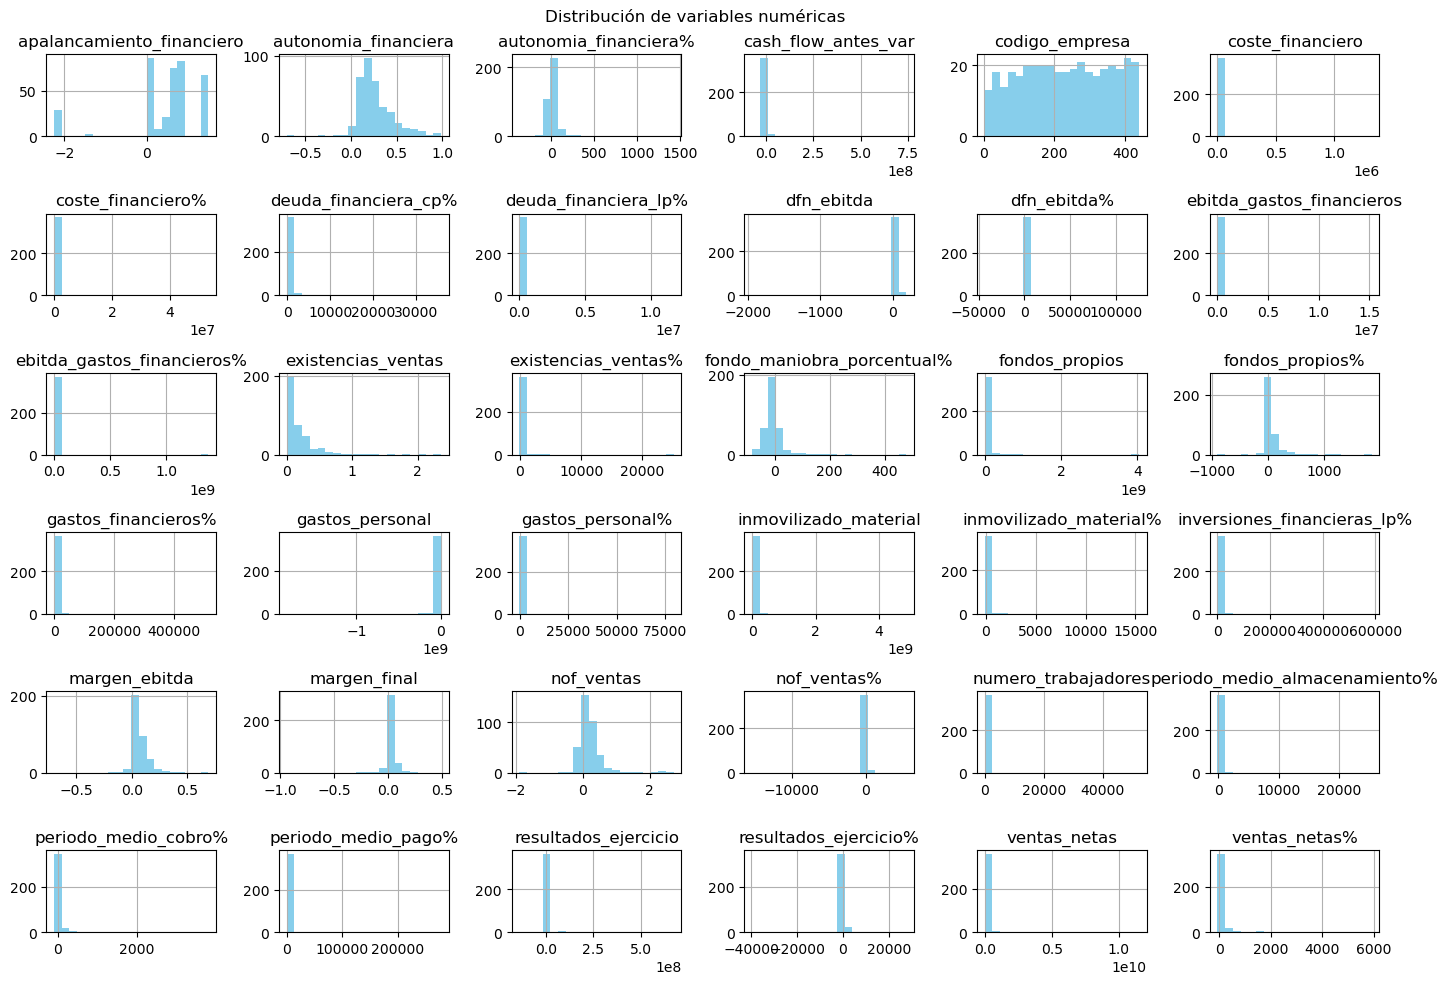

In [13]:
# Seleccionamos solo columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Histograma general 
df[numeric_cols[:100]].hist(bins=20, figsize=(14, 10), color='skyblue')
plt.suptitle("Distribución de variables numéricas")
plt.tight_layout()
plt.show()

La visualización de las distribuciones de las variables numéricas revela una gran cantidad de asimetrías y valores extremos. Muchas variables como coste_financiero%, ebitda_gastos_financieros%, ventas_netas o inversiones_financieras_lp% presentan colas largas a la derecha, indicando la presencia de outliers positivos muy grandes. También se observan algunas variables centradas alrededor de cero pero con varianza significativa, como dfn_ebitda o margen_final.

Por otro lado, algunas variables, como gastos_personal o media_dias_impago, muestran formas muy dispersas, lo que puede deberse a errores de medición o a comportamientos atípicos en ciertas empresas. Este tipo de distribución sugiere que será necesario realizar transformaciones, escalados o tratamiento específico de outliers para mejorar la calidad del modelado posterior. Además, se evidencia la necesidad de revisar estas variables en detalle para evitar que afecten negativamente al rendimiento del modelo de scoring.


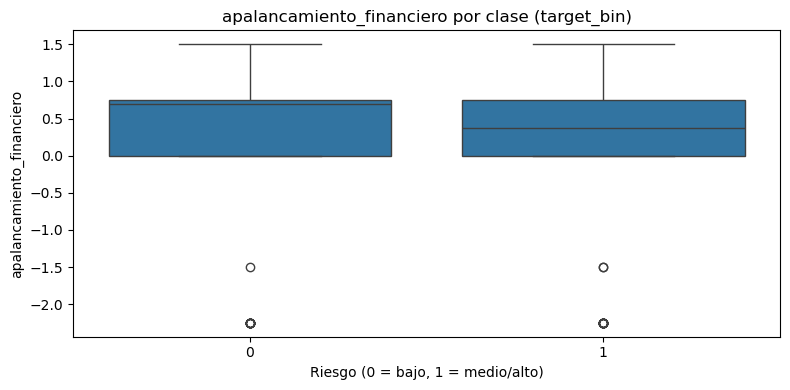

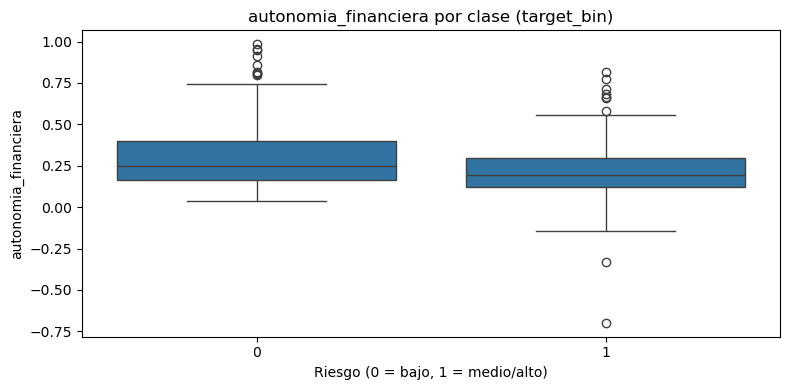

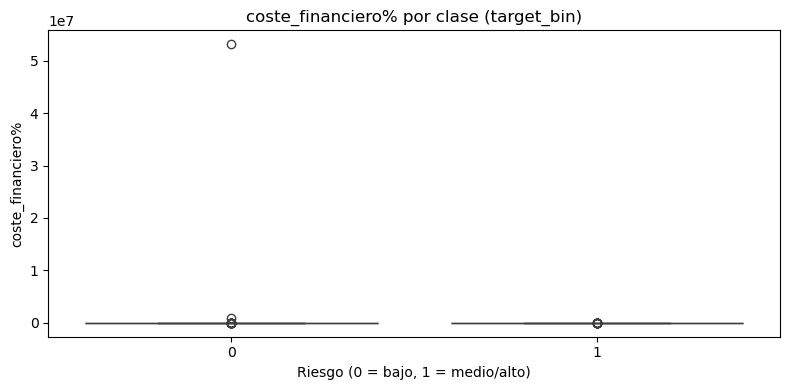

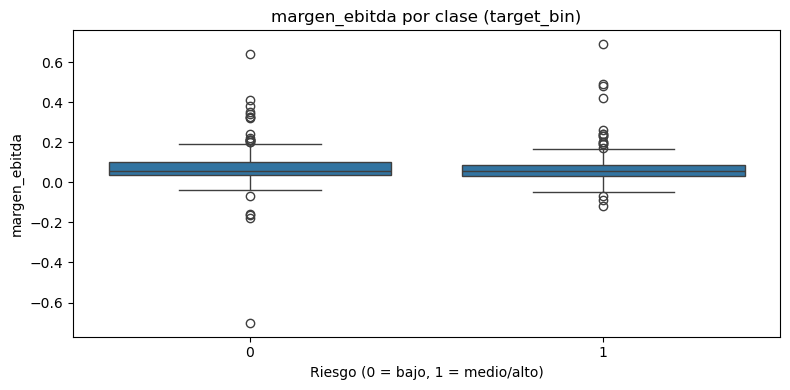

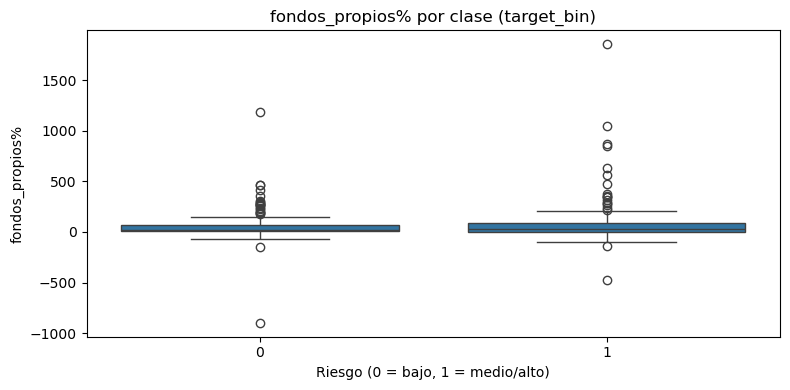

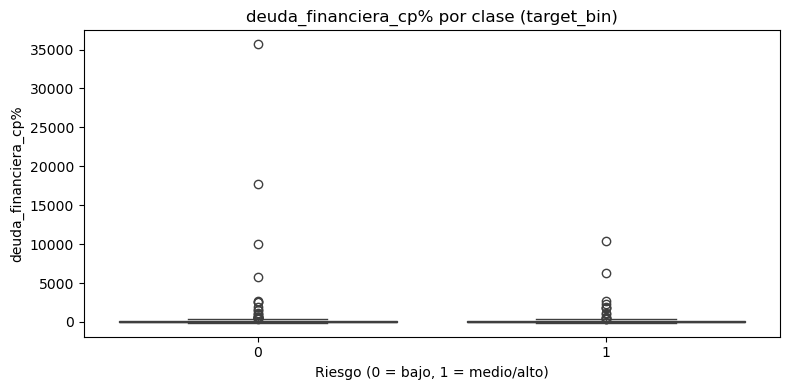

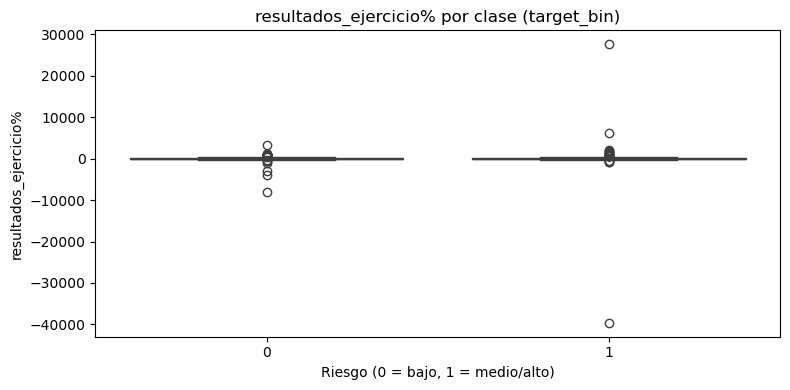

In [14]:
# Crear variable binaria de riesgo: 1 si grade_code >= 7, 0 si no
df['target_bin'] = df['grade_code'].apply(lambda x: 1 if int(x) >= 7 else 0)

# Variables a visualizar 
features_to_plot = [
    'apalancamiento_financiero', 
    'autonomia_financiera', 
    'coste_financiero%', 
    'margen_ebitda', 
    'fondos_propios%', 
    'deuda_financiera_cp%', 
    'resultados_ejercicio%'
]

# Graficar boxplots por clase de riesgo
for feature in features_to_plot:
    if feature in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='target_bin', y=feature, data=df)
        plt.title(f'{feature} por clase (target_bin)')
        plt.xlabel('Riesgo (0 = bajo, 1 = medio/alto)')
        plt.ylabel(feature)
        plt.tight_layout()
        plt.show()
    else:
        print(f' La variable "{feature}" no está en el DataFrame.')

En los gráficos de cajas (boxplots) presentados, se analizan las distribuciones de varias variables financieras según la clase de riesgo definida por la variable binaria target_bin. Esta variable se ha creado a partir de grade_code, asignando valor 1 a las empresas con una calificación igual o superior a 7 (riesgo medio/alto) y 0 a las demás (riesgo bajo).

Los resultados muestran diferencias claras en algunas variables entre los grupos de riesgo. Por ejemplo, en apalancamiento_financiero, las empresas de riesgo alto tienden a tener valores más elevados, lo cual es coherente con una mayor exposición a deuda. Por otro lado, la autonomia_financiera es generalmente más baja en el grupo de riesgo alto, lo que indica una menor proporción de fondos propios frente a los activos totales.

En cuanto al coste_financiero%, los datos presentan una gran dispersión y presencia de outliers en ambos grupos, aunque no se observa una diferencia clara entre clases. Algo similar ocurre con margen_ebitda, donde la mediana es apenas superior en empresas de bajo riesgo, sugiriendo una leve mayor rentabilidad operativa. La variable fondos_propios% no muestra diferencias evidentes en su distribución entre los grupos, aunque los outliers están presentes especialmente en el grupo de mayor riesgo.

Por último, variables como deuda_financiera_cp% y resultados_ejercicio% también presentan outliers extremos, lo que puede reflejar una fuerte heterogeneidad entre empresas. En general, estos boxplots permiten identificar patrones asociados al riesgo financiero y destacar variables con poder discriminativo potencial para modelos de scoring.

In [15]:
# Comprobamos la distribución
df['target_bin'].value_counts(normalize=True)

target_bin
0    0.594086
1    0.405914
Name: proportion, dtype: float64

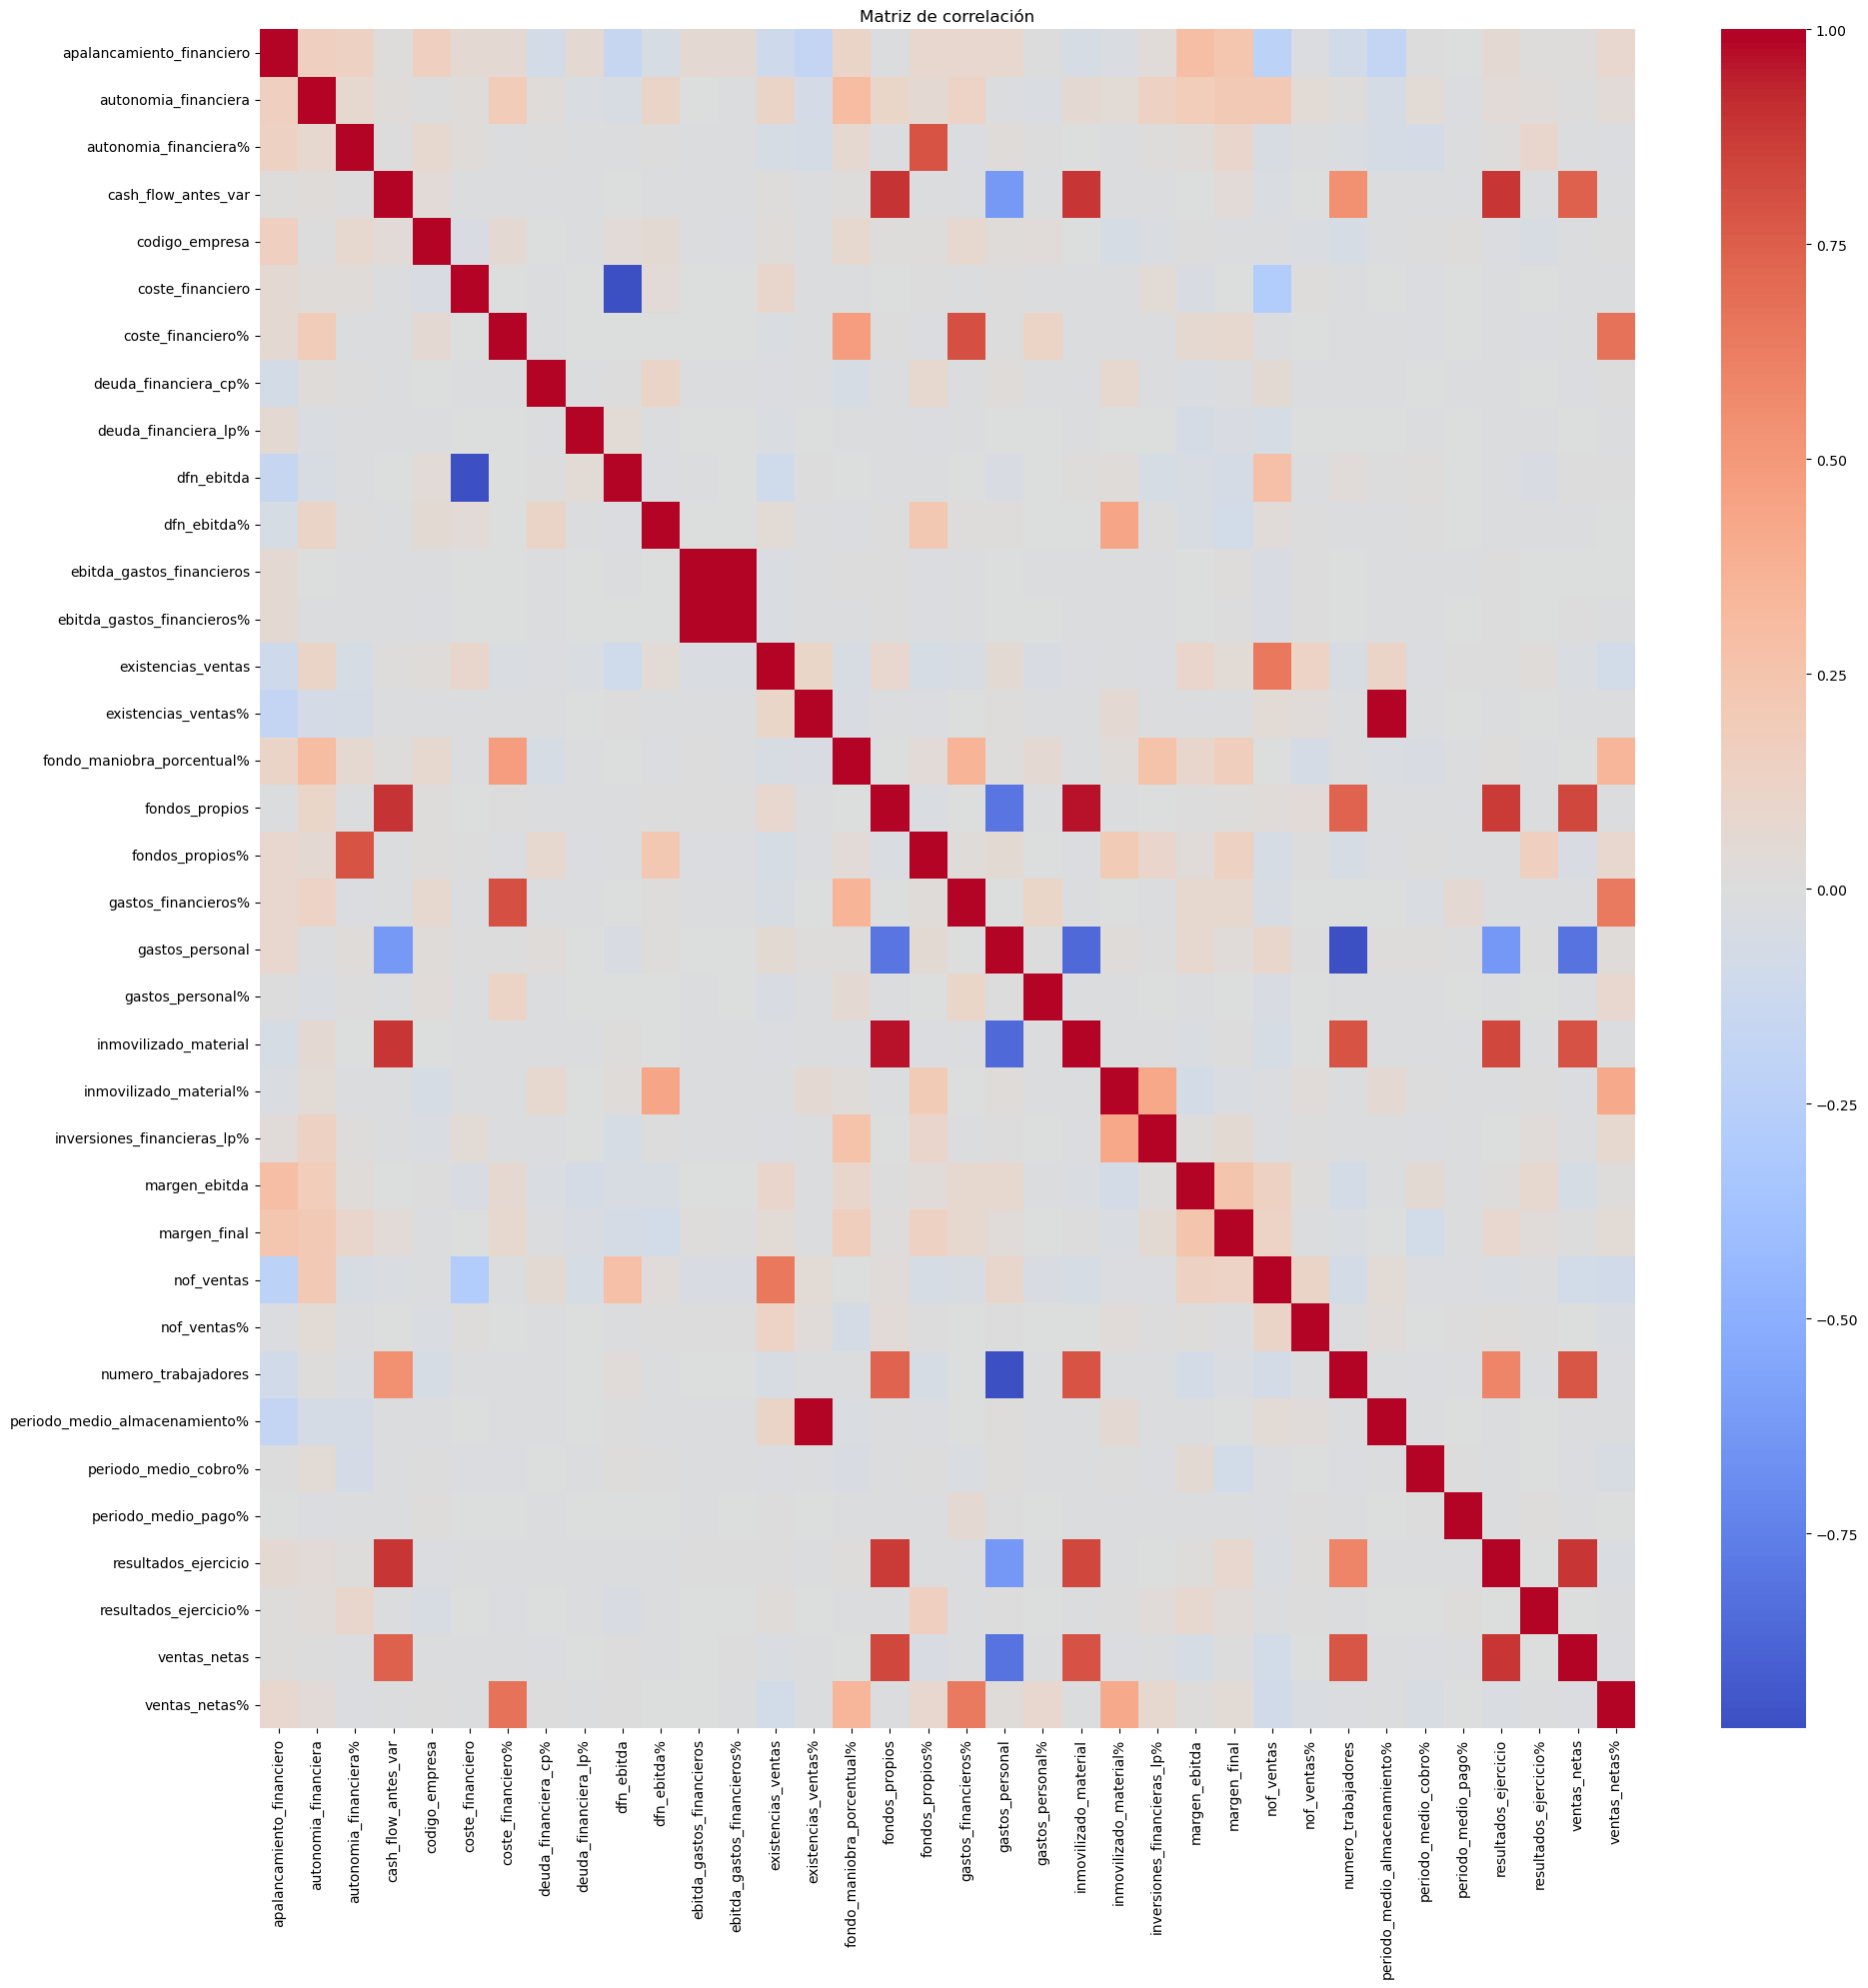

In [16]:
# Matriz de correlación (solo numéricas)
plt.figure(figsize=(20, 20))
sns.heatmap(df[numeric_cols].corr(), cmap='coolwarm', center=0)
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()


En la matriz de correlación observamos que, en general, las correlaciones entre las variables numéricas no son extremadamente altas, lo cual sugiere que no existe una multicolinealidad severa en la mayoría de los casos. No obstante, sí se aprecian algunas asociaciones destacables entre variables relacionadas conceptualmente, como por ejemplo entre fondos_propios y fondos_propios%, o entre ebitda_gastos_financieros y su correspondiente variable en porcentaje. Estas correlaciones son esperadas dado que representan el valor absoluto y su evolución o proporción, respectivamente.

En cuanto a la distribución de clases de la variable objetivo binaria target_bin, se confirma que el dataset está moderadamente balanceado: un 59.4% de las observaciones corresponden a empresas con bajo riesgo (clase 0), mientras que el 40.6% representan empresas con riesgo medio o alto (clase 1). Esta proporción es razonablemente equilibrada para tareas de clasificación, aunque en modelos posteriores puede ser útil considerar técnicas de balanceo (como SMOTE) si se busca mejorar la sensibilidad en la clase minoritaria.


# Conclusion 



El análisis exploratorio permite identificar aspectos clave sobre la estructura y calidad del conjunto de datos financieros utilizados en este trabajo. La inspección inicial revela un volumen considerable de valores nulos en varias variables, especialmente en aquellas relacionadas con la antigüedad de cuenta, morosidad e importes medios de cobro, con tasas superiores al 69%. Este hallazgo indica que dichas variables pueden no ser fiables para el modelado predictivo y que es necesario considerar su eliminación o la aplicación de técnicas de imputación adecuadas.

Asimismo, se observa un porcentaje significativo de valores faltantes en otras variables financieras como existencias_ventas%, inversiones_financieras_lp% y deuda_financiera_cp%, lo que puede deberse a problemas de calidad en el origen de los datos o a diferencias estructurales entre empresas. La presencia de estos vacíos obliga a un tratamiento cuidadoso durante el preprocesamiento, ya que una imputación incorrecta puede introducir sesgos o distorsionar las relaciones reales entre las variables.

Las estadísticas descriptivas muestran una alta variabilidad entre empresas, lo cual es esperable en contextos financieros reales. No obstante, también se detectan valores atípicos significativos en variables como ventas_netas o resultado_ejercicio, que pueden afectar el comportamiento de los modelos si no se normalizan o escalan correctamente. Por ello, se contempla la posibilidad de aplicar transformaciones logarítmicas o técnicas de detección de outliers.

En conjunto, el EDA pone de manifiesto la necesidad de realizar una limpieza exhaustiva, implementar estrategias de imputación o eliminación de columnas poco informativas, y aplicar un tratamiento adecuado de la escala y distribución de las variables. Esta fase resulta fundamental para orientar las decisiones de ingeniería de características y garantizar la fiabilidad de los modelos construidos posteriormente.
